In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/day1_cleaned.csv")

# Drop rows where critical target data (Price_Today) is missing
df = df.dropna(subset = ['Price_Today'])
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head(6)

Loaded 188 rows and 10 columns


,Commodity_Group,Commodity,Variety,MSP,Price_Today,Price_1DayAgo,Price_2DaysAgo,Arrival_Today,Arrival_1DayAgo,Arrival_2DaysAgo
0,Cereals,Bajra(Pearl Millet/Cumbu),Bold,2775.0,2763.02,2422.46,2710.44,77.10,90.00,84.40
1,Cereals,Bajra(Pearl Millet/Cumbu),Deshi,2775.0,2054.97,1884.92,1987.91,22.12,167.60,54.17
2,Cereals,Bajra(Pearl Millet/Cumbu),Hybrid,2775.0,2629.84,2010.20,2035.18,151.80,42.35,46.25
3,Cereals,Bajra(Pearl Millet/Cumbu),Local,2775.0,2383.27,2441.76,2355.34,11.76,367.98,17.12
4,Cereals,Bajra(Pearl Millet/Cumbu),Millet,2775.0,1935.05,1915.00,1917.98,30.62,48.70,6.24
6,Cereals,Bajra(Pearl Millet/Cumbu),Other,2775.0,2948.39,2738.72,3017.00,279.68,187.42,228.78


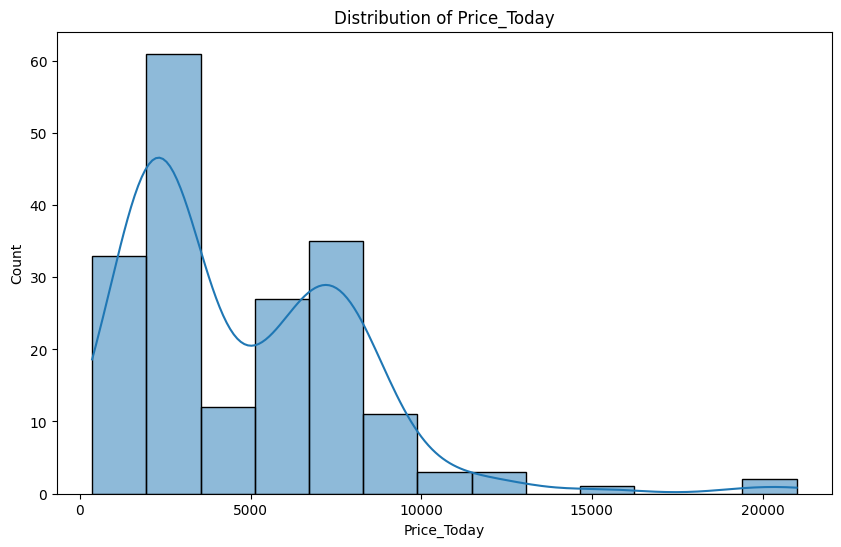

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Price_Today", kde=True)
plt.title("Distribution of Price_Today")
plt.show()

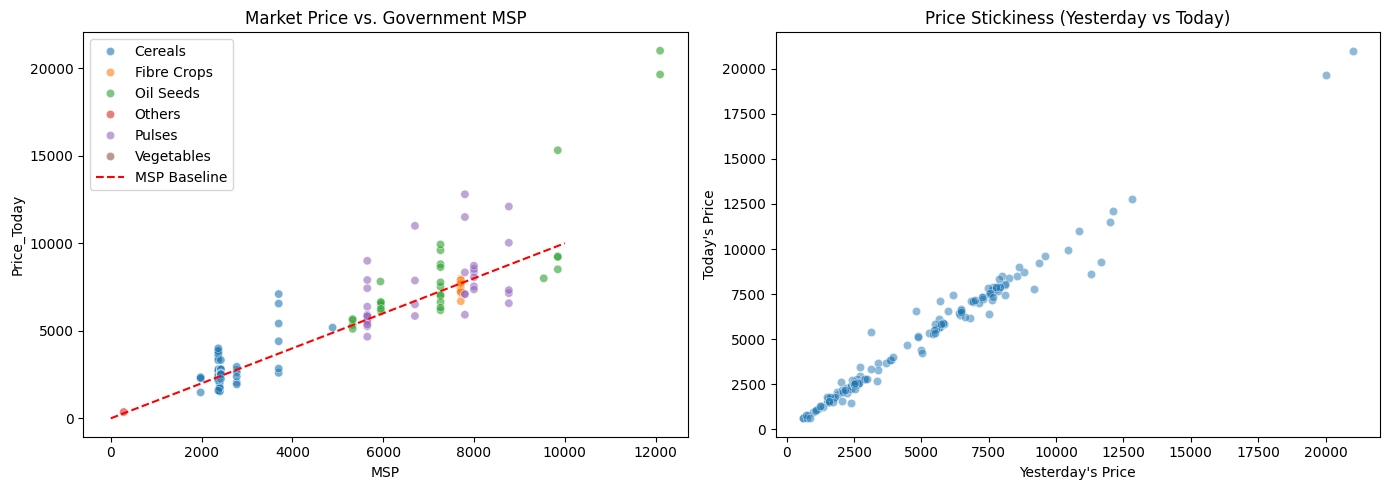

In [4]:
plt.figure(figsize=(14, 5))

# Plot 1: MSP vs Market Price
# If points are above the red line, farmers are happy (Price > MSP)
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['MSP'], y=df['Price_Today'], hue=df['Commodity_Group'], alpha=0.6)
plt.plot([0, 10000], [0, 10000], 'r--', label="MSP Baseline") # The "Breakeven" line
plt.title("Market Price vs. Government MSP")
plt.legend()

# Plot 2: Autocorrelation (Price Stickiness)
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Price_1DayAgo'], y=df['Price_Today'], alpha=0.5)
plt.title("Price Stickiness (Yesterday vs Today)")
plt.xlabel("Yesterday's Price")
plt.ylabel("Today's Price")

plt.tight_layout()
plt.show()

In [8]:
# econimic features, positive value means selling above msp price
df['msp_premium'] = df['Price_Today'] - df['MSP']
df['msp_premium_pct'] = (df['msp_premium'] - df['MSP']) / df['MSP']

# to check if there is market volatiility for high ini demand crops 
# did the prices go up or down yesterday? 
df['price_momentum'] = (df['Price_1DayAgo'] - df['Price_2DaysAgo']) / df['Price_2DaysAgo']

# standard devisition of  3 days prices combined
price_cols = ['Price_Today', 'Price_1DayAgo', 'Price_2DaysAgo']
df['price_volatility'] = df[price_cols].std(axis=1)

# any ways that there will be some type of a supply chain shock? 
# high arrivlas ususally  means that inflation of prices go down or up, potentially maybe crashing prices
df['arrival_change'] = df['Arrival_1DayAgo'] - df['Arrival_2DaysAgo']

print("Feature Engineering completed, new features are added")
df[['Commodity','Variety','msp_premium','price_momentum', 'price_volatility', 'arrival_change']].head(10)

Feature Engineering completed, new features are added


,Commodity,Variety,msp_premium,price_momentum,price_volatility,arrival_change
0,Bajra(Pearl Millet/Cumbu),Bold,-11.98,-0.106248,183.338599,5.60
1,Bajra(Pearl Millet/Cumbu),Deshi,-720.03,-0.051808,85.655304,113.43
2,Bajra(Pearl Millet/Cumbu),Hybrid,-145.16,-0.012274,350.760660,-3.90
3,Bajra(Pearl Millet/Cumbu),Local,-391.73,0.036691,44.101363,350.86
4,Bajra(Pearl Millet/Cumbu),Millet,-839.95,-0.001554,10.818717,42.46
6,Bajra(Pearl Millet/Cumbu),Other,173.39,-0.092237,144.976205,-41.36
7,Barley(Jau),Barley,365.48,0.011215,15.922969,-25.70
8,Barley(Jau),Barley-Organic,370.00,NaN,NaN,NaN
9,Barley(Jau),Dara,311.67,0.009563,25.960444,26.10
10,Barley(Jau),Other,-500.00,0.036004,500.696933,12.35


Encoded Commodity_Group: 6 unique values
Encoded Commodity: 24 unique values
Encoded Variety: 137 unique values


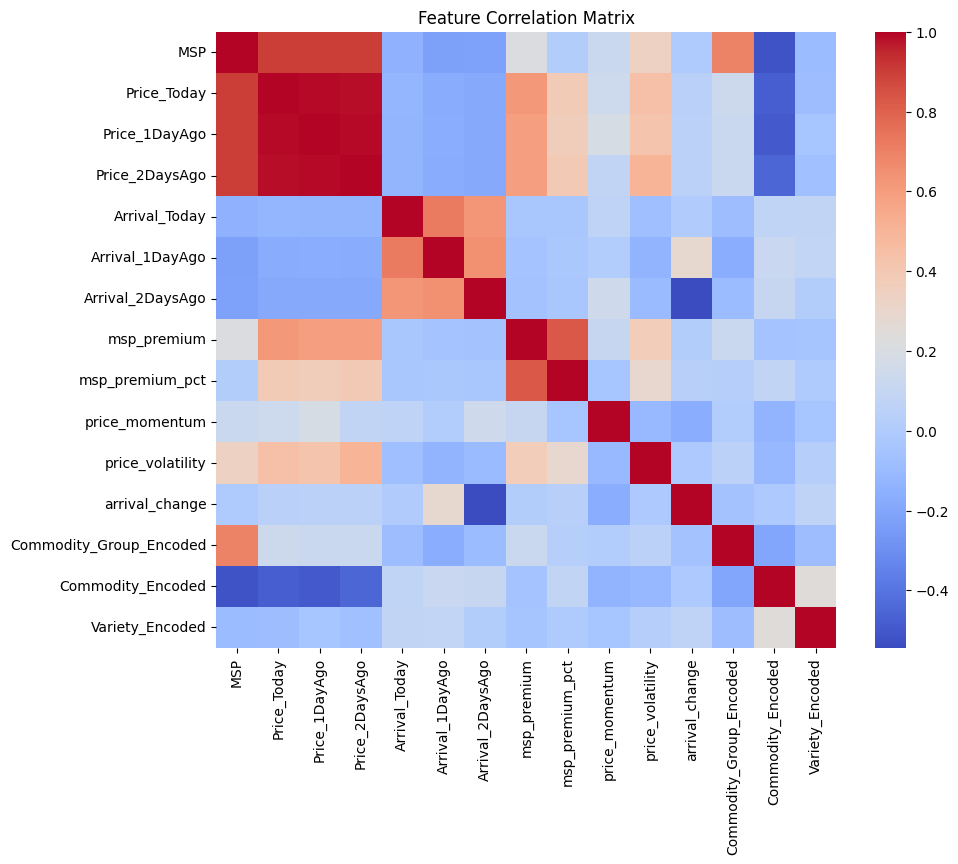

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Commodity_Group', 'Commodity', 'Variety']
encoders = {}

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        # Convert to string to handle any mixed types
        df[f'{col}_Encoded'] = le.fit_transform(df[col].astype(str))
        encoders[col] = le
        print(f"Encoded {col}: {len(le.classes_)} unique values")

# Check the final correlation map
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [10]:
df.head(10)

,Commodity_Group,Commodity,Variety,MSP,Price_Today,Price_1DayAgo,Price_2DaysAgo,Arrival_Today,Arrival_1DayAgo,Arrival_2DaysAgo,msp_premium,msp_premium_pct,price_momentum,price_volatility,arrival_change,Commodity_Group_Encoded,Commodity_Encoded,Variety_Encoded
0,Cereals,Bajra(Pearl Millet/Cumbu),Bold,2775.0,2763.02,2422.46,2710.44,77.10,90.00,84.40,-11.98,-1.004317,-0.106248,183.338599,5.60,0,1,26
1,Cereals,Bajra(Pearl Millet/Cumbu),Deshi,2775.0,2054.97,1884.92,1987.91,22.12,167.60,54.17,-720.03,-1.259470,-0.051808,85.655304,113.43,0,1,40
2,Cereals,Bajra(Pearl Millet/Cumbu),Hybrid,2775.0,2629.84,2010.20,2035.18,151.80,42.35,46.25,-145.16,-1.052310,-0.012274,350.760660,-3.90,0,1,63
3,Cereals,Bajra(Pearl Millet/Cumbu),Local,2775.0,2383.27,2441.76,2355.34,11.76,367.98,17.12,-391.73,-1.141164,0.036691,44.101363,350.86,0,1,75
4,Cereals,Bajra(Pearl Millet/Cumbu),Millet,2775.0,1935.05,1915.00,1917.98,30.62,48.70,6.24,-839.95,-1.302685,-0.001554,10.818717,42.46,0,1,91
6,Cereals,Bajra(Pearl Millet/Cumbu),Other,2775.0,2948.39,2738.72,3017.00,279.68,187.42,228.78,173.39,-0.937517,-0.092237,144.976205,-41.36,0,1,99
7,Cereals,Barley(Jau),Barley,1980.0,2345.48,2342.52,2316.54,56.44,19.13,44.83,365.48,-0.815414,0.011215,15.922969,-25.70,0,2,15
8,Cereals,Barley(Jau),Barley-Organic,1980.0,2350.00,NaN,NaN,0.88,NaN,NaN,370.00,-0.813131,NaN,NaN,NaN,0,2,16
9,Cereals,Barley(Jau),Dara,1980.0,2291.67,2261.42,2240.00,18.00,46.10,20.00,311.67,-0.842591,0.009563,25.960444,26.10,0,2,39
10,Cereals,Barley(Jau),Other,1980.0,1480.00,2385.71,2302.80,8.00,17.50,5.15,-500.00,-1.252525,0.036004,500.696933,12.35,0,2,99


In [13]:
df_final = df.select_dtypes(include=[np.number])
df_final.to_csv('../data/features/day2_features.csv', index=False)
print(f"Saved {df_final.shape[0]} rows. Ready for LightGBM.")

Saved 188 rows. Ready for LightGBM.
